# Iris Flower Classification

#### Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("C:\\Users\\22271\\Downloads\\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# data preprocessing

In [10]:
df.shape

(150, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:

df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# EDA

<Axes: xlabel='count'>

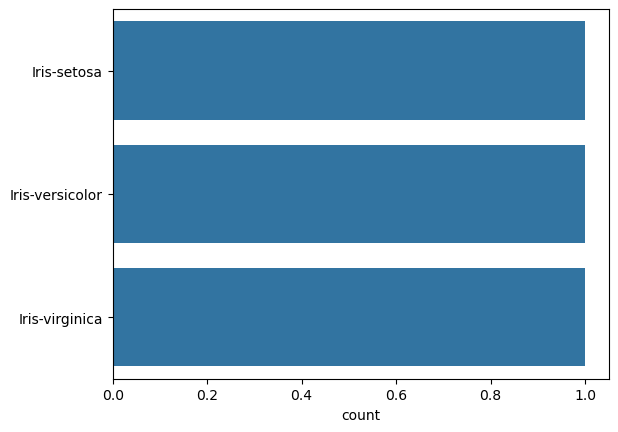

In [15]:
sns.countplot(df['species'].unique())

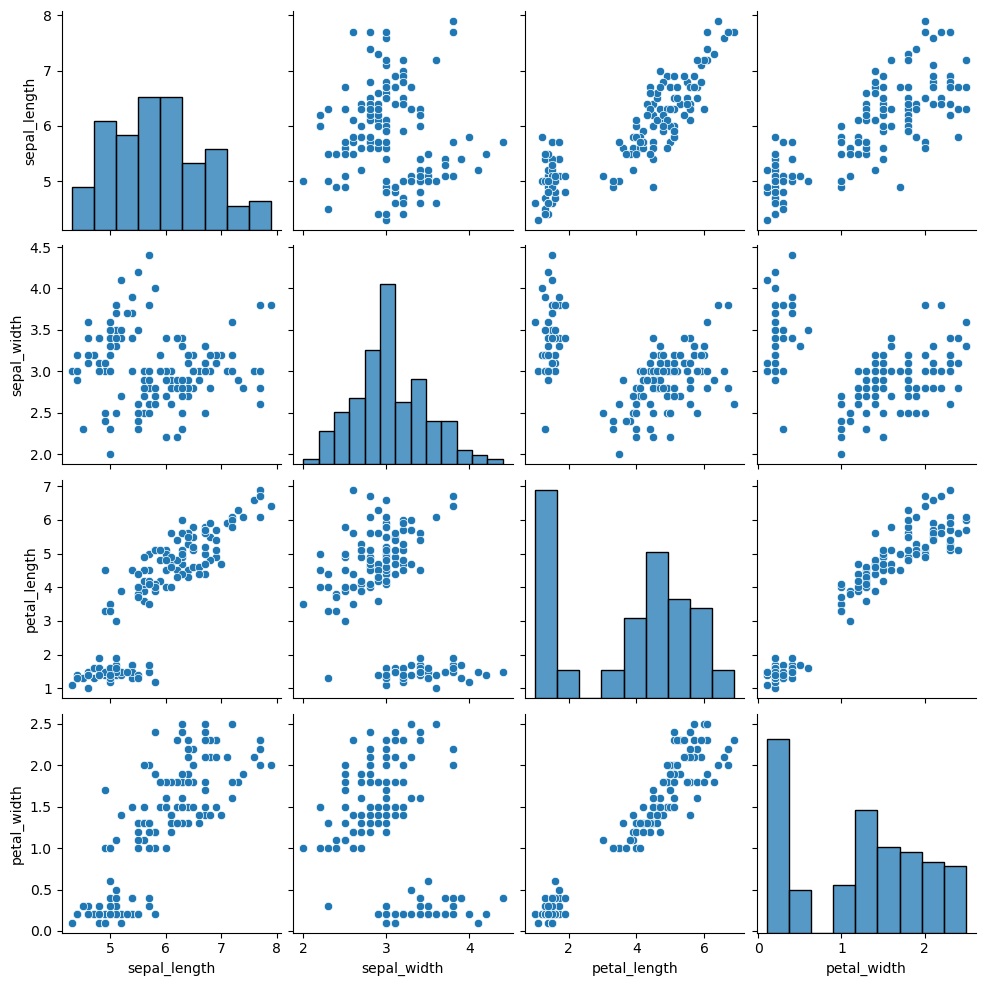

In [16]:
sns.pairplot(df)

In [17]:
# minimum sepal lengths vs different flowers
filter = df.groupby('species')['sepal_length'].min().reset_index()
filter

,species,sepal_length
0,Iris-setosa,4.3
1,Iris-versicolor,4.9
2,Iris-virginica,4.9


<Axes: xlabel='species', ylabel='sepal_length'>

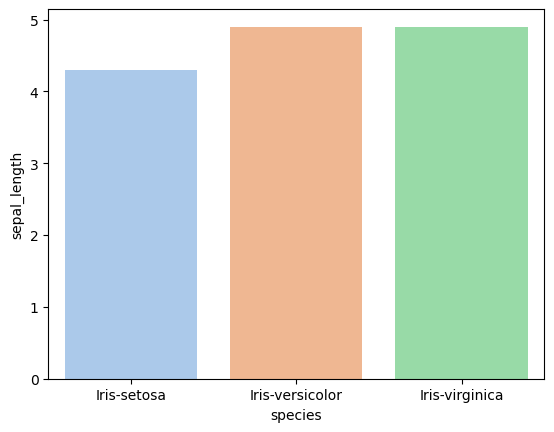

In [21]:
sns.barplot(data = filter,x='species',y='sepal_length',palette='pastel')

<Axes: xlabel='species', ylabel='sepal_width'>

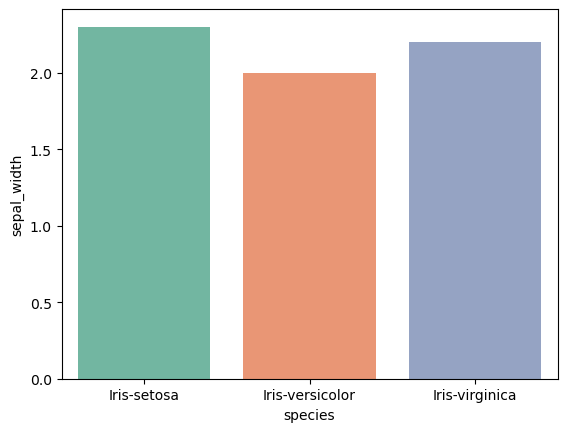

In [29]:
fil1 = df.groupby('species')['sepal_width'].min().reset_index()
sns.barplot(data=fil1,x='species',y='sepal_width',palette='Set2')

In [23]:
# species vs their minimum petal lengths, 
fil2 = df.groupby('species')['petal_length'].min().reset_index()
fil2

,species,petal_length
0,Iris-setosa,1.0
1,Iris-versicolor,3.0
2,Iris-virginica,4.5


<Axes: xlabel='species', ylabel='petal_length'>

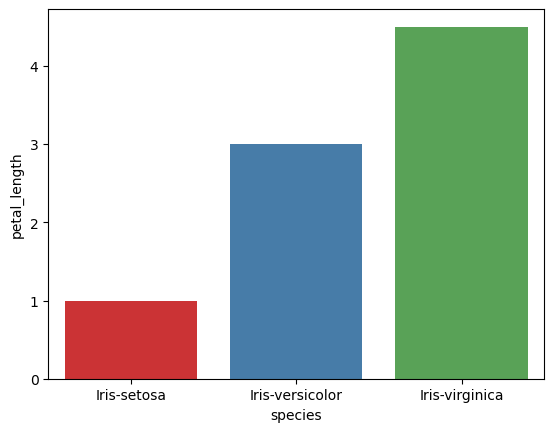

In [27]:
sns.barplot(data=fil2,x='species',y='petal_length',palette='Set1')

<Axes: xlabel='species', ylabel='petal_width'>

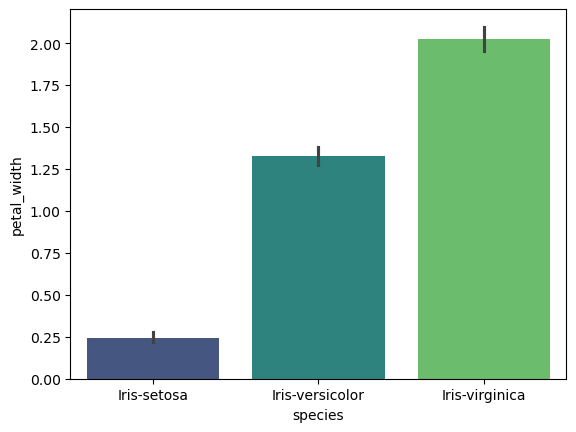

In [35]:
fil3 = df.groupby('species')['petal_width'].min().reset_index()
sns.barplot(data=df,x='species',y='petal_width',palette='viridis')

<Axes: >

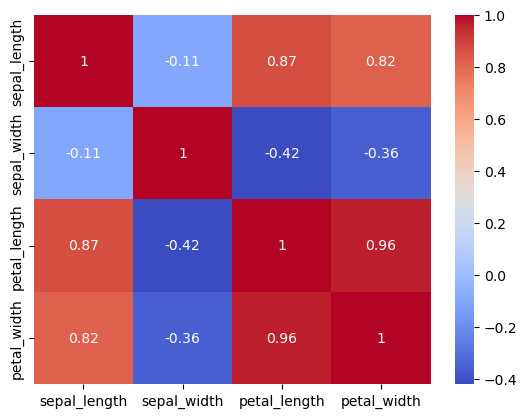

In [37]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

### Feature Engineering

In [40]:
# label encoding target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df[['species']])

### dividing train and test data

In [43]:
x = df.drop(columns = {'species'},axis=1)
y = df['species']


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,stratify=y,random_state=42)

# Model Trainning and Evaluation

In [48]:
# trainning Decision Tree as it is multi class classification

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [52]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50,min_samples_leaf=4,min_samples_split=4,ccp_alpha=0.01,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=50, min_samples_leaf=4,
                       min_samples_split=4, random_state=42)

In [64]:
ydt = dt.predict(x_test)
ydtrain = dt.predict(x_train)
print(f'trainning accuracy = {accuracy_score(y_train,ydtrain)}')
print(f'testing accuracy = {accuracy_score(y_test,ydt)}')

trainning accuracy = 0.984251968503937
testing accuracy = 0.9565217391304348


Text(0.5, 1.0, 'confusion matrix for decision tree')

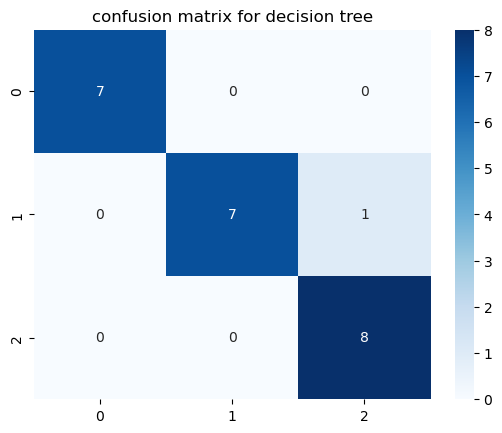

In [70]:
sns.heatmap(confusion_matrix(y_test,ydt),cmap='Blues',annot=True)
plt.title('confusion matrix for decision tree')

In [72]:
print(classification_report(y_test,ydt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.96        23
   macro avg       0.96      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23



### testing an input row

In [156]:
input = [1.3,2.2,1.1,0.3]
x = dt.predict([input])
x

array([0])

In [158]:
# the above prediction indicates it predicts setosa and also aligns with the barplot minimum values of the three species
# which we found in our EDA steps
# hence this proves that our model is working correctly